# Regresion Lineal Multiple (several features)
En el ejemplo de la venta/compra de la casa solo usamos un "feature" que es el area. Asumamos ahora que tenemos un feature mas que es el numbero de habitaciones. Como se modela esto?

$$h(\theta_0, \theta_1, \theta_2; x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 . $$

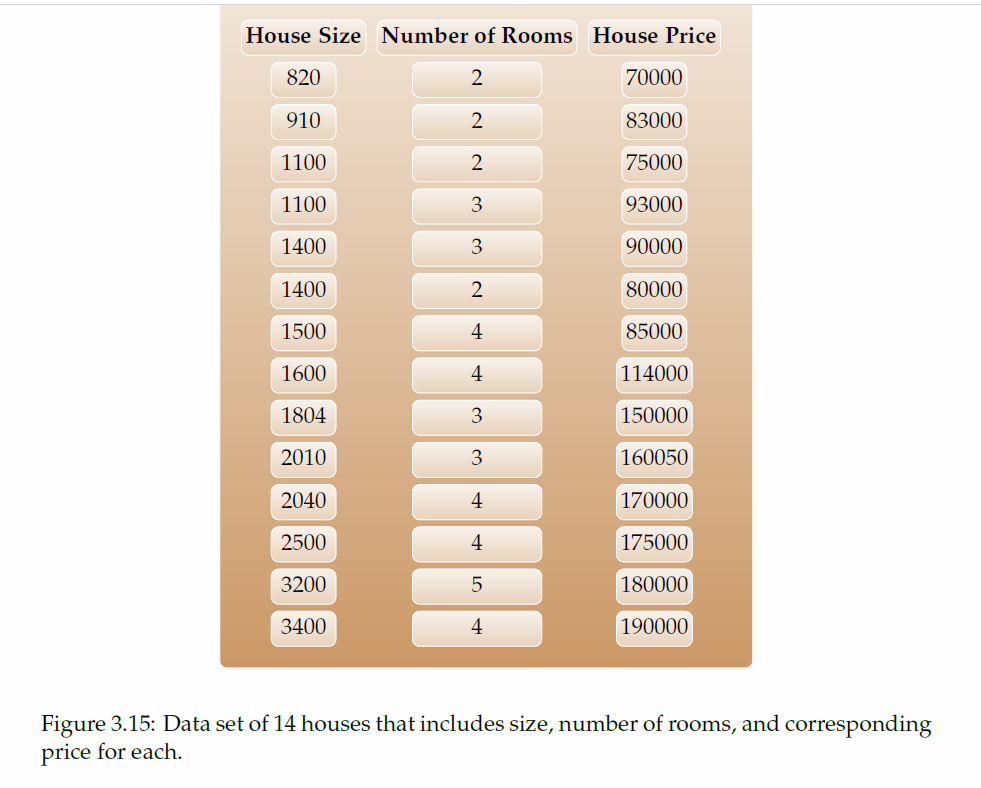

La Figura 3.15 ilustra esta situacion.

Si queremos escribir esto en forma matricial. Tenemos el sistema

$$ X \theta =  y $$
donde

$$X = \begin{pmatrix}  1 & 820 & 2  \\ 1 & 910 & 2 \\ 1 & 1100 &2 \\ &\vdots&
\\ 1 & 2500 & 4 \\ 1 & 3200 & 5 \\ 1 & 3400 & 4  \end{pmatrix}  
\quad , \quad
\theta = \begin{pmatrix}  \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix}
\quad, \quad
y = \begin{pmatrix} 70000 \\ 83000 \\ 75000 \\ \vdots \\ 175000 \\ 180000 \\ 190000 \end{pmatrix} $$

Para encontrar $\theta$ usamos el metodo de las ecuaciones normales. Es decir queremos minimizar la funcion de costo

$$J(\theta) = \frac12 \| h(\theta) - y \|^2 = \frac12 \| X \theta - y \|^2 $$
Sabemos del calculo matricial que el gradiente esta dado por

$$\nabla J(\theta) = X^T X \theta - X^T y  $$
Cuando $\nabla J(\theta)=0$ tenemos el sistema lineal

$$X^T X \theta = X^T y  $$
En el ejemplo la matriz $X^T X$ es positiva definida y la solucion es

$$\theta = (X^T X)^{-1} X^T y. $$
Ahora bien si $X^T X$ no es positiva definida (algunos autovalores son 0, debido que columnas linealmente dependientes, el espacio nulo $\mathcal{N}(A^T A) \ne \{ 0 \}$) entonces podemos regularizaro, agragandole una "basurita>0" a la diagonal. Es decir

$$\theta = (X^T X + \lambda I)^{-1} X^T y. \lambda > 0, \lambda \approx 0 $$
Esta solucion viene de la funcion extendida (regularizada) de costo

$$J(\theta) = \frac12 \| h(\theta) - y \|^2 + \lambda \| x \|^2 \quad , \quad \lambda > 0 . $$

# Feature normalizacion (normalizacion de atributos o caracteristicas).
Recordemos la tabla 3.5. Observe que los datos tiene escalas muy diferentes. Areas de miles y numero de habitaciones de hasta 5.

El problema tal como esta presenta dos dificultades:
1. Al llevar el problema a una forma cuadratica (paraboloide con contornos elipticos), los contornos son alargados y el zig-zageo es mucho mas. Es mas costoso.
2. El numero de condicion $\kappa$ es mas grande de lo que deberia ser. El hacer la normalizacion de las columnas (features) las elipses se vuelven mas circulares y el numero de condicion se reduce incrementando asi la estabilidad del problema.

Veamos algunas notas de feature normalizacion.
El **problema original** es
$$ X \theta = y  $$
Normalizamos las columnas de $X$ (en pocos minutos muestro como) y llamamos a la nueva matriz $X_n$. Resolvermos el **problema modificado**.

$$ X_n \theta_n = y  $$
pero $y$ no cambia.

Esto no es problema por que una vez obtengamos $\theta_n$, si nos dan unos nuevos datos $W$, los normalizamos con los mismos artributos que encontramos en $X$ (media, desviacion estandard, etc. Lo explico en un momento). Para estimar los nuevos costos

$$h(\theta_n) = W_n \theta_n $$

## Tipos de normalizacion:
* **Estandarizacion** (Standarization): Basicamente se hallan la media y la desviacion estandard de los datos. Se resta media y se divide por la desviacion estandard.  Es decir sea $X_j$ la columna $j$ de $X$.

$$X_j := \frac{X_j- \mu_j}{\sigma_j} $$

donde

$$\mu_j = \frac{\sum_{i=1}^m x_{ij}}{m} $$
esta suma es a lo largo de la columna.

$$\sigma_j = \sqrt{ \frac{\sum_{i=1}^m (x_{ij} - \mu_j)^2}{m}} $$

* **Mean normalization**: Se remueve la media y se divide por el rango (maximo-minimo). Veamos

$$X_j := \frac{X_j - \mu_j}{\max_i \{ x_{ij} \} - \min_i \{ x_{ij} \}}
\quad, \quad i=1,2, \cdots, m $$

* **Min-Max scaling**: El denominador es el mismo del caso anterior, pero en el numerador, en vez de restar la media resta el minimo. Veamos

$$X_j :=  \frac{X_j - \min_i \{ x_{ij} \}}{\max_i \{ x_{ij} \} - \min_i \{ x_{ij} \}}
\quad, \quad i=1,2, \cdots, m  $$
Esta normalizacion siempre produce componentes en el intervalo $[0,1]$.

* **vector normalization**: Se divide por la norma del vector (feature, la columna). Por ejemplo usando la norma $\ell_2$.

$$X_j := \frac{X_j}{\| X_j \|_2} $$

**Ejemplo 3.1.2**: Un ejemplo mas realista de regresion lineal para datos de finca raiz es el ejmplo del Boston housing data. La Tabla (Figura) 3.16) ilustra algunas estadisticas sobre esta base de datos.



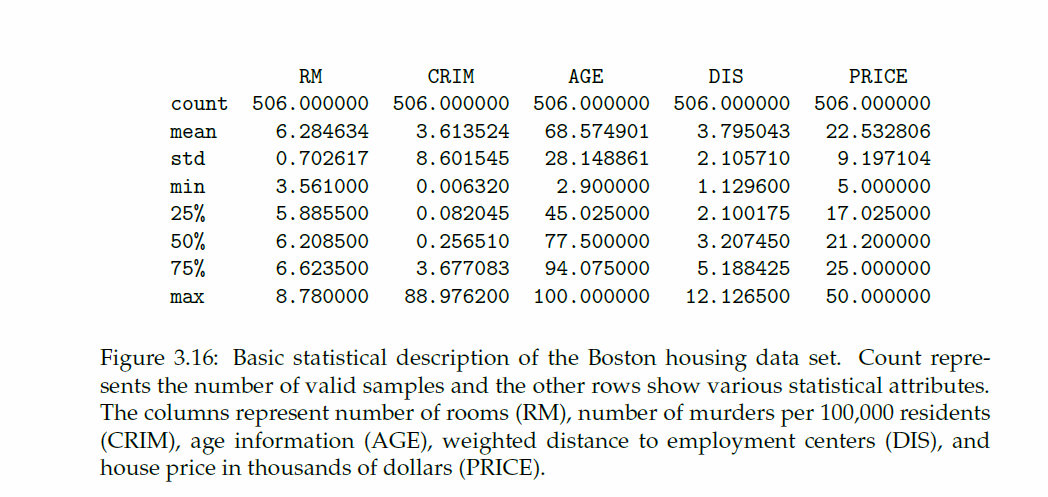

La Figura 3.18 fue elabroada con scikit-learn. Muestra la correlacion entre los atributos de la Figura 3.16. En la diagonal muestra los histogramas.

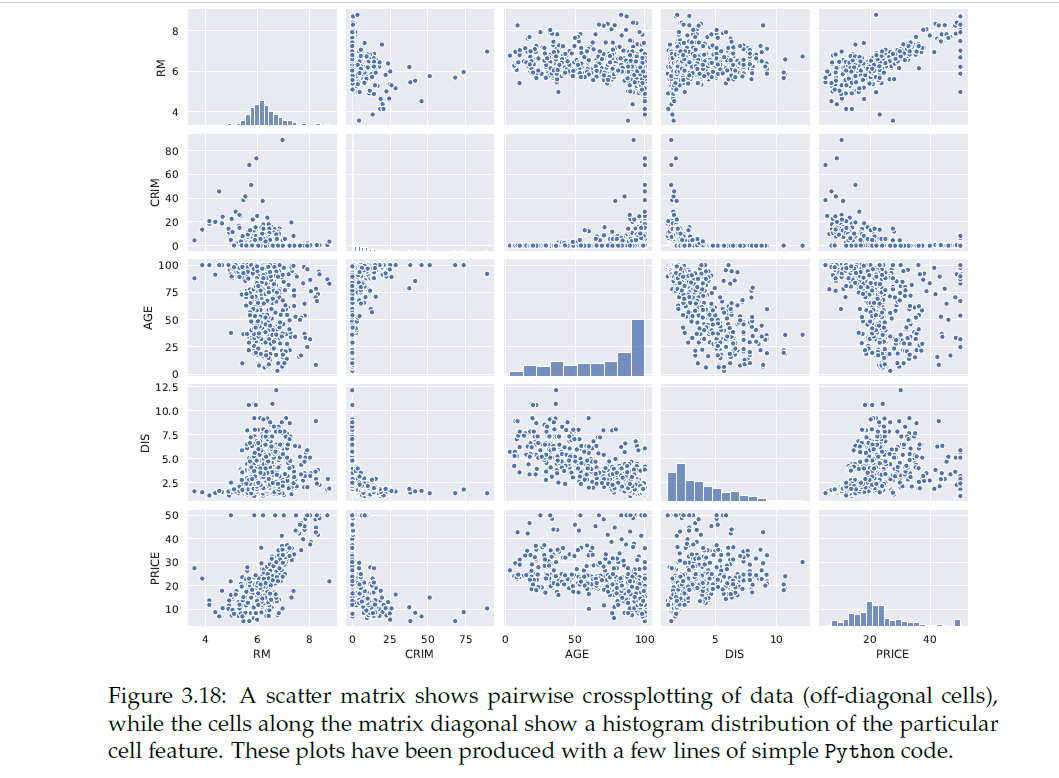

Estudiaremos dos graficas mas para entender el efecto de la normalizacion sobre los datos. (ademas de los atributos ya nombrados arriba: incremento en el numero de condicion y la "circularidad" de las matrices).

La Figura 3.19 ilustra los histogramas de las distancias a centros de produccion. Antes y despues de feature normalization.

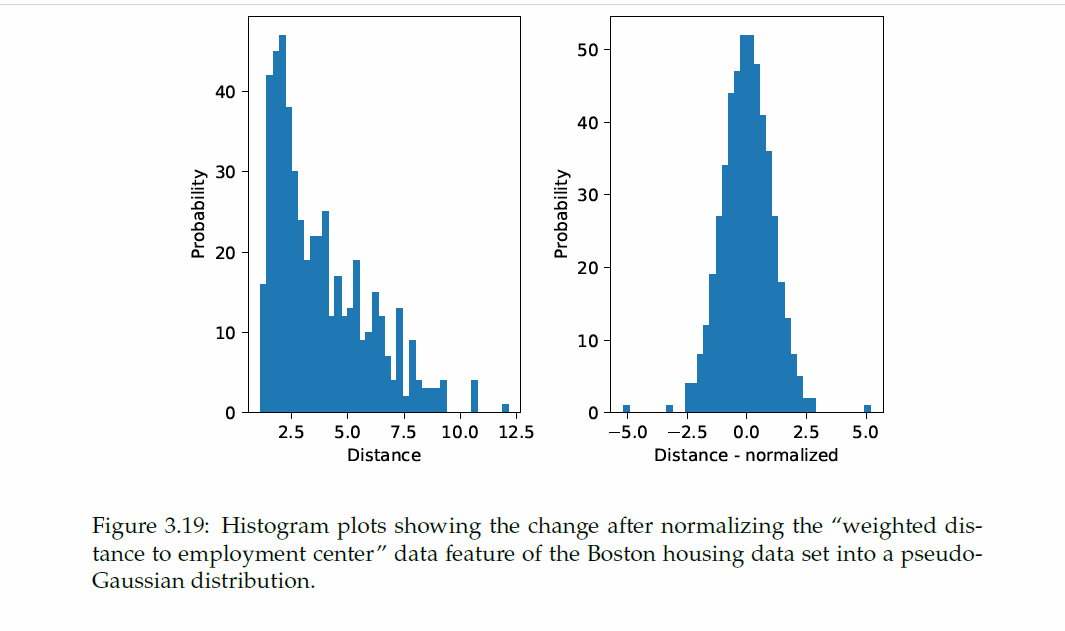

La Figura 3.20 muestra otro ejemplo. En el ejemplo hay una nube de puntos correspondientes a 3 "clusters".

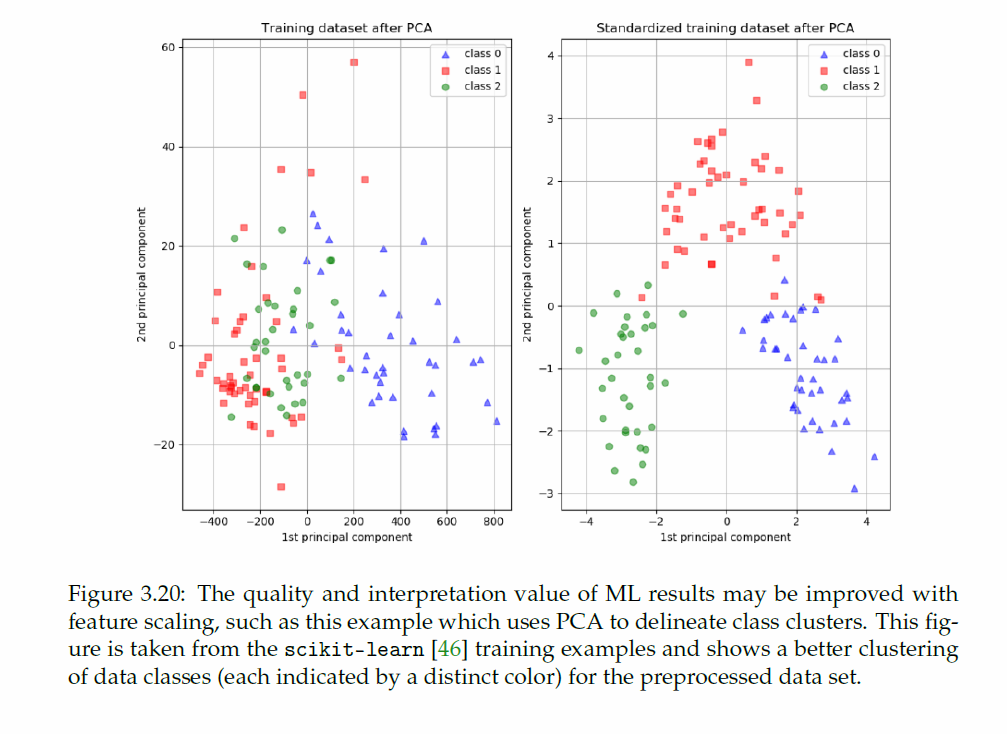

# Regresion polinomial (tambien es regresion lineal).
## Regresion polinomial en una variable $x$

$$h(\theta, x)  = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_n x^n $$
**Ojo**: El polinomio **no es lineal** en $x$, pero es lineal en $\theta$.
Es decir
$$h(\theta, x) = X \theta $$
donde $X=(1, x, \cdots, x^n)$ y $ \theta=(\theta_0, \theta_1, \cdots, \theta_n)^T$

Como se construye la ecuacion matricial

$$h(\theta, x_1)  = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \cdots + \theta_n x_1^n $$
$$h(\theta, x_2)  = \theta_0 + \theta_1 x_2 + \theta_2 x_2^2 + \cdots + \theta_n x_2^n $$
$$ \vdots $$
$$h(\theta, x_m)  = \theta_0 + \theta_1 x_m + \theta_2 x_m^2 + \cdots + \theta_n x_m^n $$

Es decir que tenemos el sistema

$$
\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n  \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n  \\
\vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \\
\vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \\
1 & x_m & x_m^2 & \cdots & \cdots & \cdots & x_m^n  \\
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\vdots \\
\theta_n
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
\vdots \\
y_m
\end{pmatrix}
$$

Hay un caso especial: $n=m$, entonces la matriz se llama
[Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix) esta matriz es
invertible. Y sucede que es la matriz de interpolacion de Lagrange.

Veamos la diferencia entre interpolacion y regresion lineal.

* **interpolacion**: La curva (en este caso es curva por que es una sola variable, con dos variables superficie y con mas variables hipersuperficie)
**tiene que pasar por todos los puntos**.

* **regresion**: La curva no esta obligada a pasar por ningun punto.

Si $m=n$ la matriz de Vandermonde es invertible y se juntan los dos: regresion e interpolacion son la misma cosa.

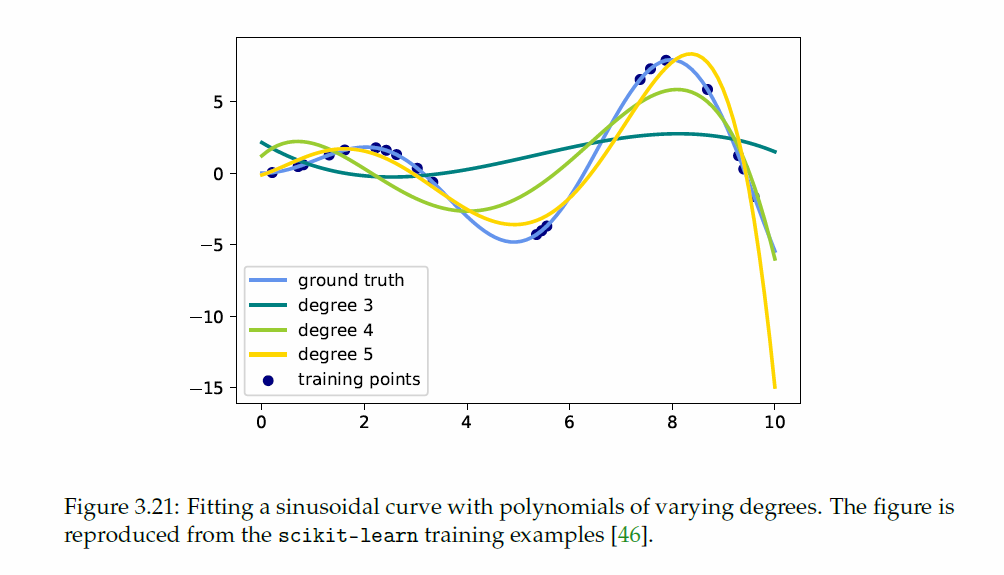

La matriz de Vandermonde: $m=n$

$$
V =
\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n  \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n  \\
\vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \\
\vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \vdots &  \\
1 & x_n & x_n^2 & \cdots & \cdots & \cdots & x_n^n  \\
\end{pmatrix}
$$
En este caso

$$\theta = V^{-1} y $$

# Regresion polinomial en varias variables.
Por ejemplo ajustar los precios de la casa con varias caracteristicas: numero de habitaciones, area, estrato.

Por ejemplo, en dos variables $x_1, x_2$ cuadratico.

$$h(\theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, x_1, x_2)
= \theta_0 + \theta_1 x_1+ \theta_2 x_2  + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2   $$

La matriz $X$ esta representada con la notacion $x_{ij}$ para $i=1,2, \cdots, m$ muestra (fila) y $j=1,2$ variable (columna o feature)

$$X = \begin{pmatrix}
1 & x_{11} & x_{12} & x_{11} x_{12} & x_{11}^2 & x_{12}^2 \\
1 & x_{21} & x_{22} & x_{21} x_{22} & x_{21}^2 & x_{22}^2 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \\
1 & x_{m1} & x_{m2} & x_{m1} x_{m2} & x_{m1}^2 & x_{m2}^2 \\
\end{pmatrix} $$

## Generalicemos la regresion polinomial.
Consideremos, por ejemplo, polinomios en dos variables de orden 3. Voy a evitar los terminos cuadraticos puros $x_1^2, x_2^2$.  

$$h(\theta) = p_\theta(x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 x_2 + \theta_5 x_1 x_2^2 + \theta_6 x_1^3 + \theta_7 x_2^3 $$

La matriz correspondiente es

$$
\begin{pmatrix}
1 & x_{11} & x_{12} & x_{11} x_{12} & x_{11}^2 x_{12} & x_{11} x_{12}^2  & x_{11}^2 & x_{12}^3 \\
1 & x_{21} & x_{22} & x_{21} x_{22} & x_{21}^2 x_{22} & x_{21} x_{22}^2  & x_{21}^2 & x_{22}^3 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
1 & x_{m1} & x_{m2} & x_{m1} x_{m2} & x_{m1}^2 x_{m2} & x_{m1} x_{m2}^2  & x_{m1}^2 & x_{m2}^3 \\
\end{pmatrix}
$$

# Underfitting/Overfitting (subajuste-sobreajuste).
Que es overfitting? Es ajustar demasiado los datos en el entrenamiento. A un ninho le ensenha que 3 naranjas  + 2 naranjas son 5 naranjas. Sobreajustar es memorizar. Entonces le dice al ninho cuanto es 2 limones mas 5 limones y dira que no sabe por que se lo sabe solo con naranjas. El sobreajuste tiene el problema de que los parametros $\theta$ no **generalizan**, es decir no funcionan bien con datos externos.

Underfitting es insuficiencia en el estimado. Hay un error muy grande. Es como tratar de ajustar unos datos de un modelo no lineal como $f(x)=\sin x \log(x)$ que son los datos de la Figura 3.21 con un modelo lineal en $x$. O sea una linea.

Veamos la Figura 3.22

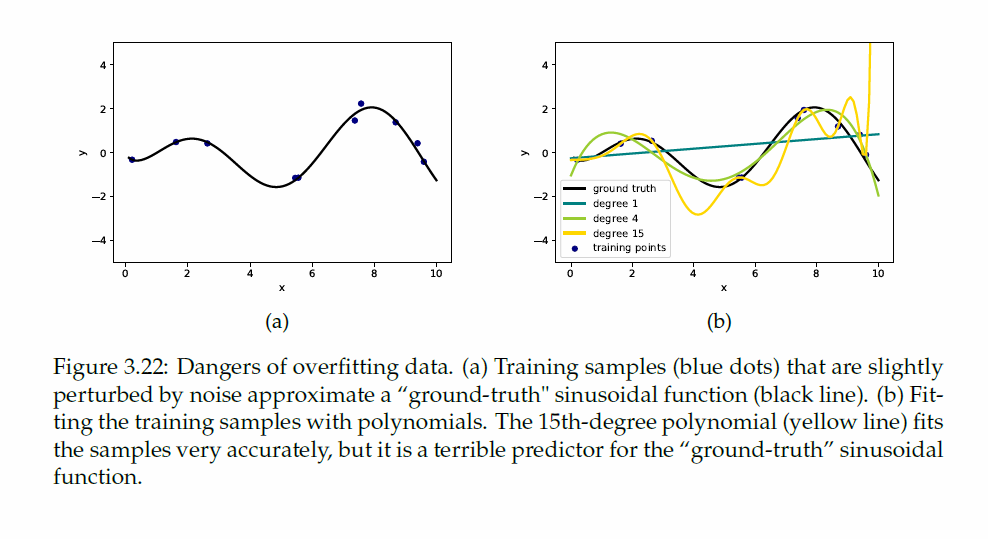

En la figura el "ground truth" es lo verdadero $f(x)=\sin x \log x$.
Los puntos azules a la izquierda tienen un leve ruido. A la derecha tenemos

* La regresion lineal (la linea azul aquamarina). Muy pobre la aproximacion. Esto es **underfitting**.
* Polinomio de grado 4. Sigue la curvatura de los puntos con cierta proximidad. (esto podria ser **fitting**).
* Polinomio de grado 15 se ajusta perfectamente a todos y cada uno de los puntos. Esto es **overfitting**. Problemas? muchos. No generaliza, muy sensible al ruido, oscilaciones altas en amplitud y frecuencia.

Como se elimina el overfitting?

* Reduciendo el numero de "features" (el grado del polinomio o si son redes neuronales el numero de nodos por capa o el numero de capas).
* Aumentar los datos.
* Regularizacion (lo vemos en unos minutos). Hacer $\lambda$ mas grande.
* Hay otros metodos que explico en DL (Dropout).

De la misma forma el underfitting se corrige con

* Aumentando el numero de "features"
* Disminuir el tamanho de $\lambda$.

Hablemos de regularizacion.


## Regresion polinomica regularizada.
Recuerde

$$J(\theta) = \frac12 \| X \theta - y \|^2 + \lambda \| \theta \|^2 $$

Veamos un ejemplo.

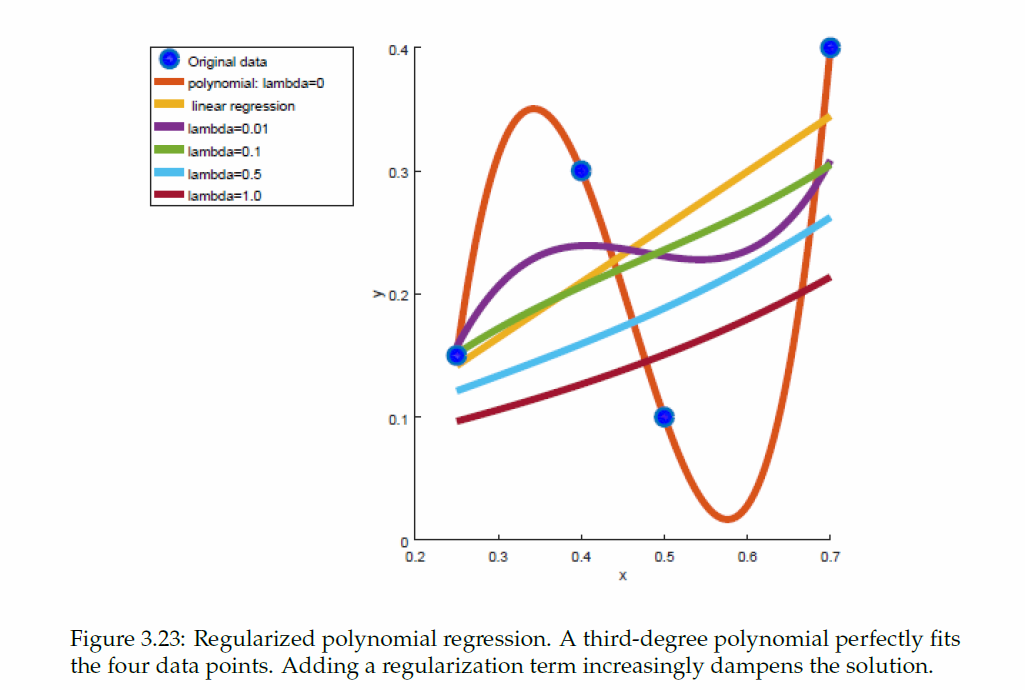

# Regresion lineal general.
Por ejemplo, considere

$$h(\theta, x) = \theta_0 + \theta_1 \sqrt{x} $$
Esta una funcion lineal en $\theta$.
Piense en la matriz de este problem?

Otro ejemplo  mas general. (en dos variables. Superficie)

$$h(\theta_0, \theta_1, \theta_2, x_1, x_2) = \theta_0 + \theta_1 \sqrt{x_1} + \theta_2 \exp(x_2) $$

Ejercicio: Construya la matriz $X$?

**Ejemplo 3.1.3**: (Tercera ley de Kepler): Basado en datos experimentales tomados por Tycho Brahe, Johannes Kepler (1571-1630) postulo la relacion analitca entre el periodo de translacion de un planeta al rededor del sol y el radio medio del planeta.

$$ T(r, \theta_1) = \alpha r^{\theta_1} $$
Encontrar $\alpha, \theta_1$ para la ecuacion anterior. Ayuda: tome logaritmo.

De otra forma no es lineal en los $\theta$s. Si la ecuacion, por ejemplo, tiene $\sqrt{\theta}$ :(

La Figura  3.24 muestra la table de Kepler (de Brahe).

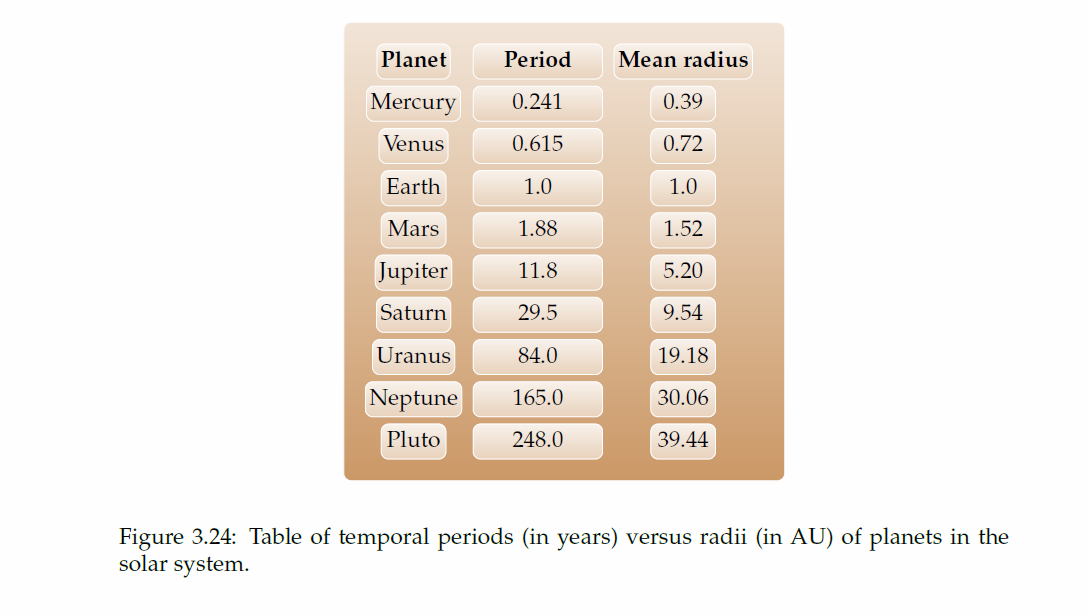

# Validacion del modelo.
Hay tres tipos de validacion que conozco

* Parta los datos en dos grupos. El grupo de entrenamiento es mas grande y el grupo de prueba (test) es el resto. Por decir algo
    * entrenamiento 70%
    * prueba 30%

* Parta los datos en 3 grupos: El de entrenamiento es el mas grande, luego le sigue el de **cross-validation** y por ultimo el de prueba. Por ejemplo
    * entrenamiento %60 (para entrenar)
    * validacion cruzada %20 (hacerle tunning a los parametro)
    * prueba %20 (para descartar o verificar overfitting).

* El ultimo metodo se llama $k$-fold validation.
Se parten los datos en $k$ grupos. $k>3$
    * Se separan los primeros $k-1$ en entrenamiento y el ultimo $k$ en  prueba
        * $1,2, \cdots, k-1$ entrenamiento (se juntan)
        * $k$ prueba (testing)
    * Se separan los $1, 3, \cdots, k$ para entrenamiento y $2$ para prueba
        * $1,3, \cdots, k-1$ entrenamiento
        * $2$ prueba (testing)
    * Y asi sucesivamente. Los primeros $n$, $1,2, \cdots n$ junto con los $n+1, n+2, \cdots, k$ ($n < k$) para prueba y el $n$ para entrenamiento
        * $1,3, \cdots, n$ $\cup$ $n+1, n+2, \cdots, k$, $n<k$ entrenamiento
        * $n$ prueba (testing)
    * $\vdots $
    *
        * $1,2, \cdots, k-1$ entrenamiento
        * $k$ prueba (testing)

En caso se calcula el RMS (Root Mean Square error) y se promedian.

En el caso de regresion la variable $y$. Existe otra tecnica supervisada de ML que se llama **clasificacion**.

En los metodos supervisados estudiamos los dos problemas
* Regresion (lineal)
* Clasificacion.

# Clasificacion.
Existen "infinidad" de problemas practicos que requieren soluciones discretas. La regresion como la estudiamos en esta clase es **continua**.
Por ejemplo

* Un paciente se diagnostica "si" o "no" para diabetes.
* Un servidor de e-mail quiere detectar si un email es "spam" o "no spam".
* Los bancos tratan de predecir si un producto puede ser "si" o "no" fraudulento.

En la clasificacion usamos **prediccion**.

En esta clase (curso) veremos los siguientes metodos predictivos (de clasificacion)

* Regresion logistica (hoy comenzamos con esto)
* SVM: Support Vector Machines
* ANN: Artificial Neural Networks.

Otros metodos no estudiados en esta clase por falta de tiempo son:
* Arboles de decision (decision tres)
* Bosques aleatorios (Random Forests. RD).

## Regresion Logistica:
Si pensamos en la regresion como la hemos venido estudiando, tendriamos

$$h(\Theta) = X \Theta = Y $$
Note primero que los simbolos son mayusculas. Aca $X, \Theta, Y$ pueden ser matrices.

Esta hipotesis tiene problemas en el disceto. Por que $Y$ puede tomar solo dos valores (si es binario)
Ya esto es un problema.

La funcion objetivo:
$$\min_{\Theta} J(\Theta) = \min_{\text{sobre} \Theta} \frac12 \| X \Theta - Y \|^2 $$

Esta seria la funcion de costo en regresion lineal. Vamos a ver que esta funcion de costo no es **apropiada** para clasficacion.

# Proxima clase

* Mostramos por que estas ecuacion de regresion lineal no son apropiadas para el problema de clasificacion.
* Obtenemos la funcion de costo $J(\Theta)$ apropiada para clasificacion usando **regresion logistica**. Se define este termino en la proxima clase.
* Obtenemos el gradiente de la funcion de costo. $\nabla_{\Theta} J(\Theta)$$.
Con estos datos es suficiente para entrenar un sistema de clasificacion. Vemos ejemplos de esto y la tarea para dentro de 15 dias usa estas tecnicas.